<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Artin%20Sinani%20-%20Stream_Wars_Attack%20of%20the%20Clones_%20Should%20NFLX%20be%20afraid%20of%20competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
Lambda Project Week (Week 5)

Data Collected:
- NFLX Stock Prices (All Time)
- Netflix Quarter to Quarter Figures
  - Q1 ALL Time
  - Q2 ALL Time
  - Q3 ALL Time
  - Q4 ALL Time
  
"""

'\nLambda Project Week (Week 5)\n\nData Collected:\n- NFLX Stock Prices (All Time)\n- Netflix Quarter to Quarter Figures\n- 2018 Fastest Growing Discretionary Income by Country\n- Highest User Rated Movies/TV Shows for 2018 in that Country\n\n'

#Import

In [0]:
import pandas as pd
from pandas_datareader import data, wb
import pandas_datareader as web
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style

NFLX = data.DataReader(name='NFLX', data_source='yahoo', start='2002-05-23')

nflx_net_add_all = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/Netflix%20Net%20Subscriber%20Growth%20All%20Time.csv', header=None, skiprows=1)

nflx_q1 = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/nflx%20q1.csv') 
                      #names=['Year','Year','Subscribers','Domestic Streaming','International Streaming']
nflx_q2 = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/q2%20nflx.csv')
nflx_q3 = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/q3%20nflx.csv')

nflx_q4 = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/master/q4%20nflx.csv')

#  usecols=['Year','Year', 'Subscribers', 'Domestic Streaming', 'International Streaming'])[['0','1','2','3','4']



NFLX.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2002-05-23,1.242857,1.145714,1.156429,1.196429,104790000.0,1.196429
2002-05-24,1.225000,1.197143,1.214286,1.210000,11104800.0,1.210000
2002-05-28,1.232143,1.157143,1.213571,1.157143,6609400.0,1.157143
2002-05-29,1.164286,1.085714,1.164286,1.103571,6757800.0,1.103571
2002-05-30,1.107857,1.071429,1.107857,1.071429,10154200.0,1.071429


In [0]:
nflx_q2.head()

,Date,Domestic,International,Quarter-Year
0,6/30/02,17779,0,Q2-02
1,6/30/03,35148,0,Q2-03
2,6/30/04,69604,0,Q2-04
3,6/30/05,193943,0,Q2-05
4,6/30/06,128605,0,Q2-06


In [0]:
nflx_q3.head()

,Quarters,Domestic,International,Date
0,Q3-02,21147,0,2002-09-30
1,Q3-03,38326,0,2003-09-30
2,Q3-04,71130,0,2004-09-30
3,Q3-05,97878,0,2005-09-30
4,Q3-06,135210,0,2006-09-30


In [0]:
nflx_q4.head()

,Quarter-Year,Domestic,International,Date
0,Q4-02,23246,0,2002-12-30
1,Q4-03,44334,0,2003-12-30
2,Q4-04,76223,0,2004-12-30
3,Q4-05,101967,0,2005-12-30
4,Q4-06,142586,0,2006-12-30


In [0]:
nflx_q1.head()

,Dates,Domestic Streaming,International Streaming,Adj Close
0,2002-03-30,14872,0,0.000000
1,2003-03-30,29928,0,1.453571
2,2004-03-30,56444,0,4.910000
3,2005-03-30,93986,0,1.464286
4,2006-03-30,126220,0,4.091429


In [0]:
nflx_net_add_all.T.head()

,0,1,2,3
0,Subscribers,Domestic Streaming,International Streaming,NaN
1,Q1-02,14872,0,NaN
2,Q2-02,17779,0,NaN
3,Q3-02,21147,0,NaN
4,Q4-02,23246,0,NaN


#Cleaning

In [0]:
nflx_q1.head()

,Dates,Domestic Streaming,International Streaming,Adj Close
0,2002-03-30,14872,0,0.000000
1,2003-03-30,29928,0,1.453571
2,2004-03-30,56444,0,4.910000
3,2005-03-30,93986,0,1.464286
4,2006-03-30,126220,0,4.091429


In [0]:
nflx_net = nflx_net_add_all.T.drop(0)

In [0]:
nflx_net.head()

,0,1,2,3
1,Q1-02,14872,0,NaN
2,Q2-02,17779,0,NaN
3,Q3-02,21147,0,NaN
4,Q4-02,23246,0,NaN
5,Q1-03,29928,0,NaN


In [0]:
nflx_net = nflx_net.rename(columns={0:'Quarters-Year', 1:'Domestic Streaming', 2:'International',3:'DIE'})

In [0]:
nflx_net_add = nflx_net.drop('DIE', axis=1)

In [0]:
nflx_net_add.head()

,Quarters-Year,Domestic Streaming,International
1,Q1-02,14872,0
2,Q2-02,17779,0
3,Q3-02,21147,0
4,Q4-02,23246,0
5,Q1-03,29928,0


In [0]:
nflx_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Dates                      17 non-null object
Domestic Streaming         17 non-null int64
International Streaming    17 non-null int64
Adj Close                  17 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 624.0+ bytes


In [0]:
nflx_q1['International Streaming'] = nflx_q1['International Streaming'].index.astype(int)

In [0]:
nflx_q1['Adj Close'] = nflx_q1['Adj Close'].index.astype(int)

In [0]:
nflx_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Dates                      17 non-null object
Domestic Streaming         17 non-null int64
International Streaming    17 non-null int64
Adj Close                  17 non-null int64
dtypes: int64(3), object(1)
memory usage: 624.0+ bytes


In [0]:
nflx_q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Date             17 non-null object
Domestic         17 non-null int64
International    17 non-null int64
Quarter-Year     17 non-null object
dtypes: int64(2), object(2)
memory usage: 624.0+ bytes


In [0]:
nflx_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Quarters         17 non-null object
Domestic         17 non-null object
International    17 non-null int64
Date             17 non-null object
dtypes: int64(1), object(3)
memory usage: 624.0+ bytes


In [0]:
nflx_q3['Domestic'] = nflx_q3['Domestic'].index.astype(int)

In [0]:
nflx_q3['International'] = nflx_q3['International'].index.astype(int)

In [0]:
nflx_q3['Date'] = pd.to_datetime(nflx_q3['Date'])

In [0]:
nflx_q3['Quarters'] = nflx_q3['Quarters'].index.astype(str)

In [0]:
nflx_q3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Quarters         17 non-null object
Domestic         17 non-null int64
International    17 non-null int64
Date             17 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 624.0+ bytes


In [0]:
nflx_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Quarter-Year     17 non-null object
Domestic         17 non-null int64
International    17 non-null int64
Date             17 non-null object
dtypes: int64(2), object(2)
memory usage: 624.0+ bytes


In [0]:
nflx_q4['Date'] = pd.to_datetime(nflx_q4['Date'])

In [0]:
nflx_q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
Quarter-Year     17 non-null object
Domestic         17 non-null int64
International    17 non-null int64
Date             17 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 624.0+ bytes


#Visualization 

In [0]:
nflx_q1.head()

,Dates,Domestic Streaming,International Streaming,Adj Close
0,2002-03-30,14872,0,0
1,2003-03-30,29928,1,1
2,2004-03-30,56444,2,2
3,2005-03-30,93986,3,3
4,2006-03-30,126220,4,4


In [0]:
nflx_q1['Dates'] = pd.to_datetime(nflx_q1['Dates'])

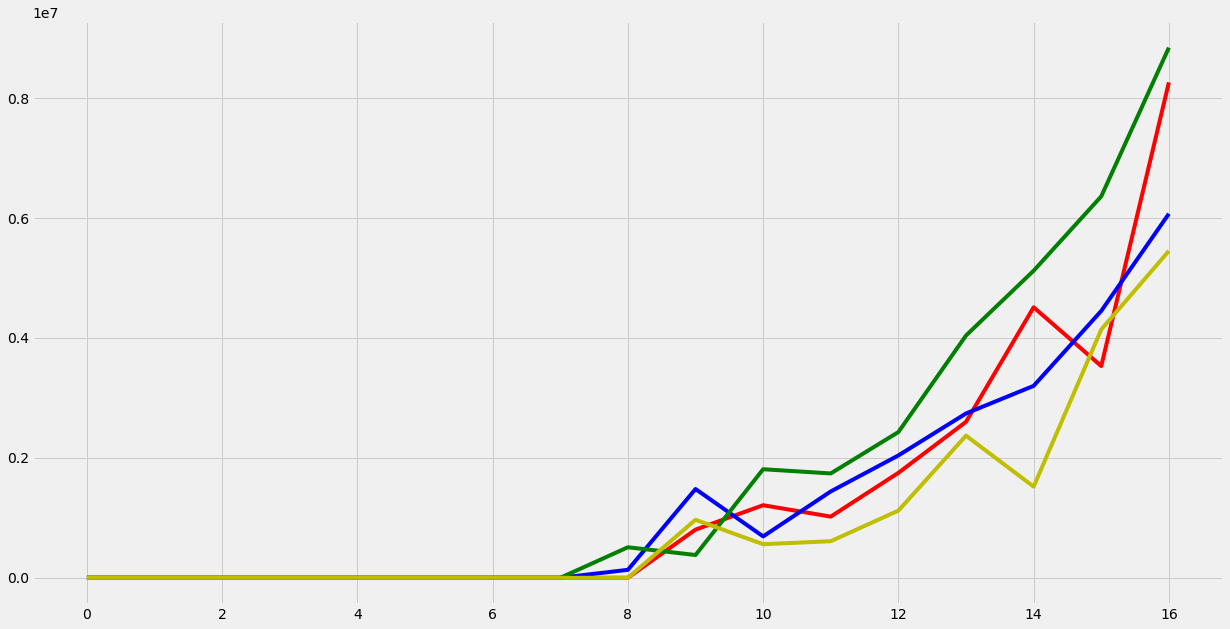

In [0]:
#plt.plot(nflx_q1['Domestic Streaming'])
plt.plot(nflx_q1['International Streaming'], c='r');
plt.plot(nflx_q3['International'], c='b');
plt.plot(nflx_q4['International'], c='g');
plt.plot(nflx_q2['International'], c='y');

In [0]:
nflx_q1.count()

Dates                      17
Domestic Streaming         17
International Streaming    17
Adj Close                  17
dtype: int64

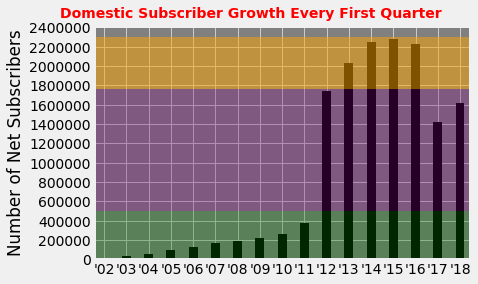

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([14872,
                  29928,
                  56444,
                  93986,
                  126220,
                  165189,
                  187156,
                  217456,
                  259560,
                  376992,
                  1740000,
                  2030000,
                  2250000,
                  2280000,
                  2230000,
                  1420000,
                  1620000],
                index=["'02","'03","'04","'05","'06","'07","'08",
                       "'09","'10","'11","'12","'13","'14","'15",
                       "'16","'17","'18"])

ax = nflx.plot.bar(color='black', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(0,4000000,200000),
      facecolor='gray')

# fig.patch.set_facecolor

font = {'color':'red'}

ax.text(x=-2, y=2500000, s="Domestic Subscriber Growth Every First Quarter",
       fontsize=14, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='green', alpha=0.3)
ax.axhspan(500000, 1760000, facecolor='purple', alpha=0.3)
ax.axhspan(1760000, 2300000, facecolor='orange', alpha=0.5)


ax.tick_params(labelrotation=0)

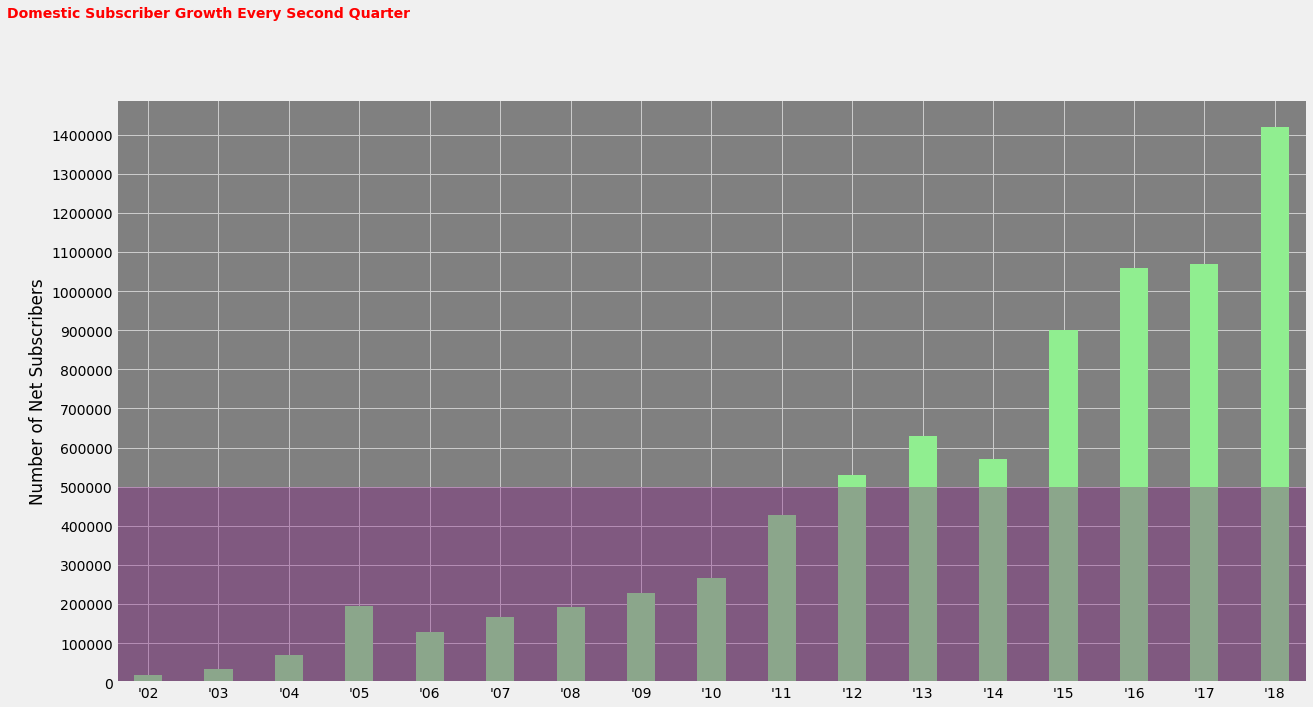

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([17779,
35148,
69604,
193943,
128605,
166838,
193769,
227316,
265387,
428203,
530000,
630000,
570000,
900000,
1060000,
1070000,
1420000],
                index=["'02","'03","'04","'05","'06","'07","'08",
                       "'09","'10","'11","'12","'13","'14","'15",
                       "'16","'17","'18"])

ax = nflx.plot.bar(color='lightgreen', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(0,1650000,100000),
      facecolor='gray')

# fig.patch.set_facecolor

font = {'color':'red'}

ax.text(x=-2, y=1700000, s="Domestic Subscriber Growth Every Second Quarter",
       fontsize=14, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='purple', alpha=0.3)
# ax.axhspan(100000, 200000, facecolor='purple', alpha=0.3)
# ax.axhspan(300000, 100000, facecolor='orange', alpha=0.5)


ax.tick_params(labelrotation=0)

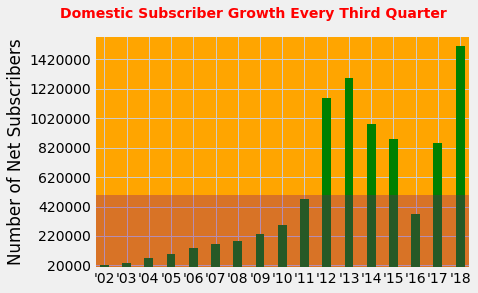

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([21147,
38326,
71130,
97878,
135210,
163707,
186573,
233091,
292406,
471823,
1160000,
1290000,
980000,
880000,
370000,
850000,
1510000],index=["'02","'03","'04","'05","'06","'07","'08",
                       "'09","'10","'11","'12","'13","'14","'15",
                       "'16","'17","'18"])

ax = nflx.plot.bar(color='green', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(20000,1800000,200000),
      facecolor='orange')

# fig.patch.set_facecolor

font = {'color':'red'}

ax.text(x=-2, y=1700000, s="Domestic Subscriber Growth Every Third Quarter",
       fontsize=14, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='purple', alpha=0.3)
# ax.axhspan(100000, 200000, facecolor='purple', alpha=0.3)
# ax.axhspan(300000, 100000, facecolor='orange', alpha=0.5)

ax.tick_params(labelrotation=0)

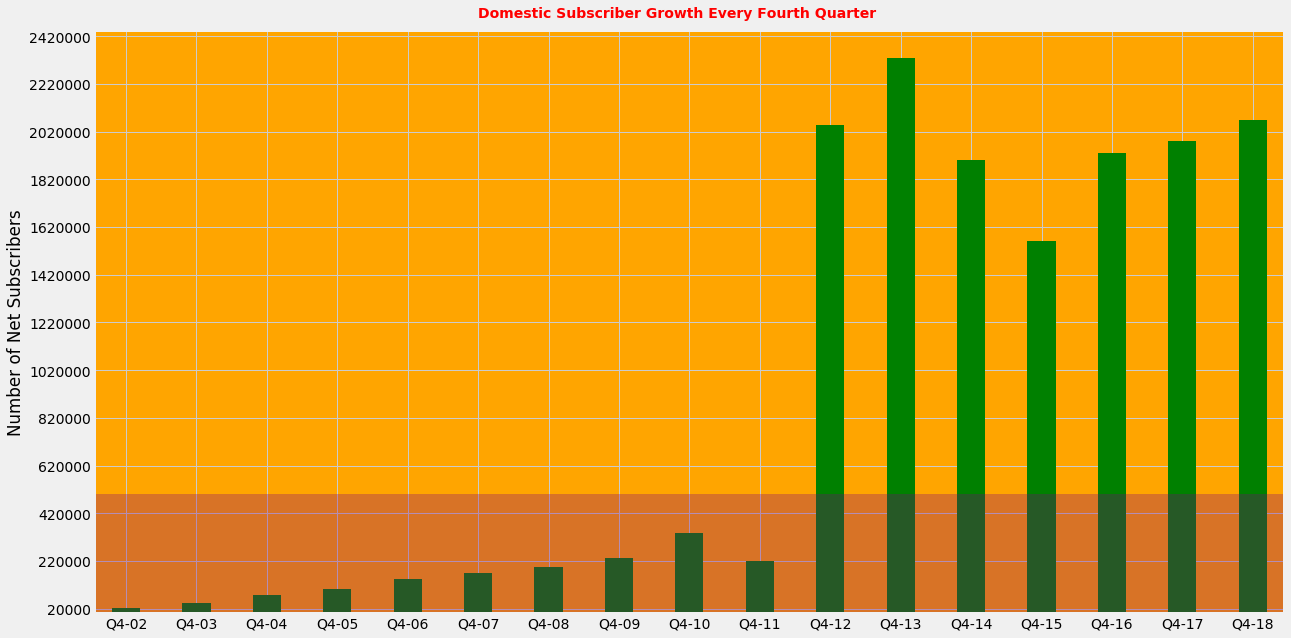

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([23246,
44334,
76223,
101967,
142586,
168673,
193625,
231598,
336756,
220000,
2050000,
2330000,
1900000,
1560000,
1930000,
1980000,
2070000],index=nflx_q4['Quarter-Year'])
# "'02","'03","'04","'05","'06","'07","'08",
#                        "'09","'10","'11","'12","'13","'14","'15",
#                        "'16","'17","'18"]
ax = nflx.plot.bar(color='green', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(20000,2500000,200000),
      facecolor='orange')

# fig.patch.set_facecolor

font = {'color':'red'}

ax.text(x=5, y=2500000, s="Domestic Subscriber Growth Every Fourth Quarter",
       fontsize=14, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='purple', alpha=0.3)
# ax.axhspan(100000, 200000, facecolor='purple', alpha=0.3)
# ax.axhspan(300000, 100000, facecolor='orange', alpha=0.5)

ax.tick_params(labelrotation=0)

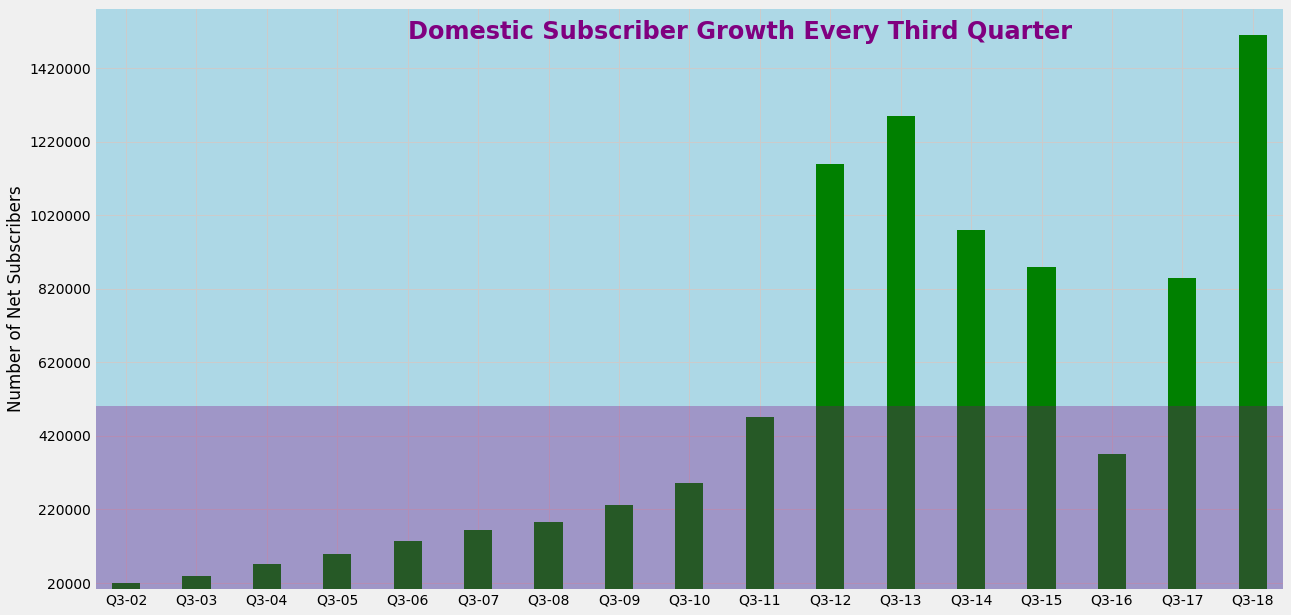

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([21147,
38326,
71130,
97878,
135210,
163707,
186573,
233091,
292406,
471823,
1160000,
1290000,
980000,
880000,
370000,
850000,
1510000],index=nflx_q3['Quarters'])
# "'02","'03","'04","'05","'06","'07","'08",
#                        "'09","'10","'11","'12","'13","'14","'15",
#                        "'16","'17","'18"]
ax = nflx.plot.bar(color='green', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(20000,1700000,200000),
      facecolor='lightblue')

# fig.patch.set_facecolor

font = {'color':'purple'}

ax.text(x=4, y=1500000, s="Domestic Subscriber Growth Every Third Quarter",
       fontsize=24, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='purple', alpha=0.3)
# ax.axhspan(100000, 200000, facecolor='purple', alpha=0.3)
# ax.axhspan(300000, 100000, facecolor='orange', alpha=0.5)

ax.tick_params(labelrotation=0)

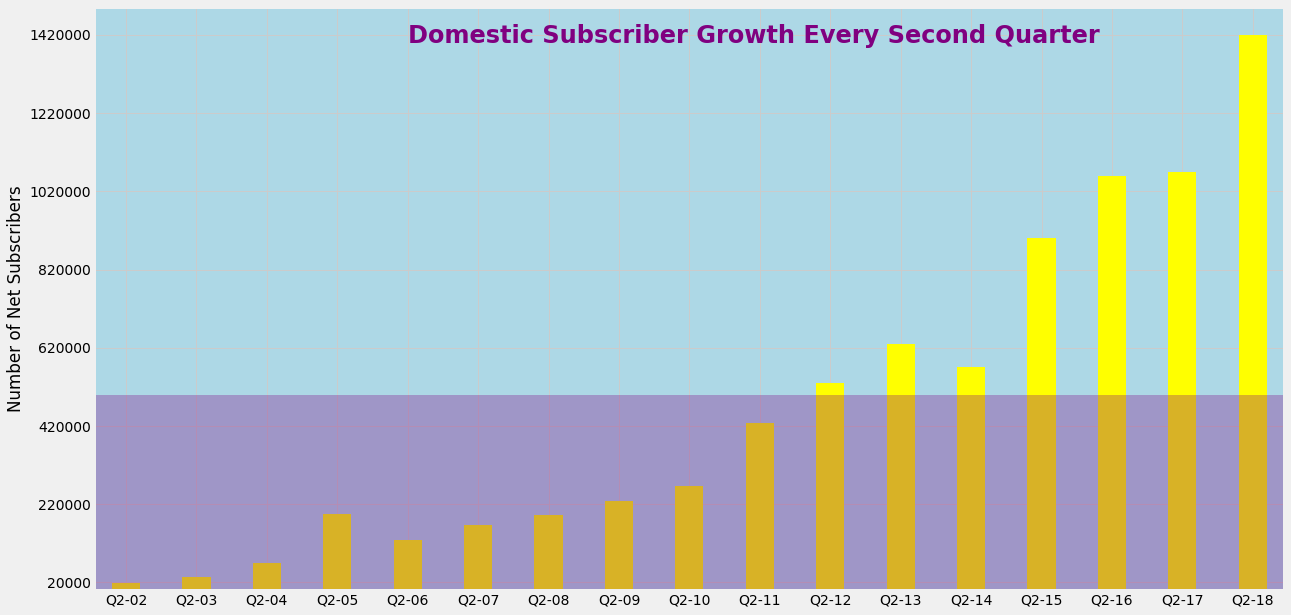

In [0]:
plt.style.use('fivethirtyeight')

nflx = pd.Series([17779,
35148,
69604,
193943,
128605,
166838,
193769,
227316,
265387,
428203,
530000,
630000,
570000,
900000,
1060000,
1070000,
1420000],index=nflx_q2['Quarter-Year'])
# "'02","'03","'04","'05","'06","'07","'08",
#                        "'09","'10","'11","'12","'13","'14","'15",
#                        "'16","'17","'18"]
ax = nflx.plot.bar(color='yellow', width=0.4);


ax.set(xlabel='', ylabel='Number of Net Subscribers', 
      yticks=range(20000,1600000,200000),
      facecolor='lightblue')

# fig.patch.set_facecolor

font = {'color':'purple'}

ax.text(x=4, y=1400000, s="Domestic Subscriber Growth Every Second Quarter",
       fontsize=24, fontweight='bold', fontdict=font);
# ax.set_xticks()
ax.axhspan(0, 500000, facecolor='purple', alpha=0.3)
# ax.axhspan(100000, 200000, facecolor='purple', alpha=0.3)
# ax.axhspan(300000, 100000, facecolor='orange', alpha=0.5)

ax.tick_params(labelrotation=0)

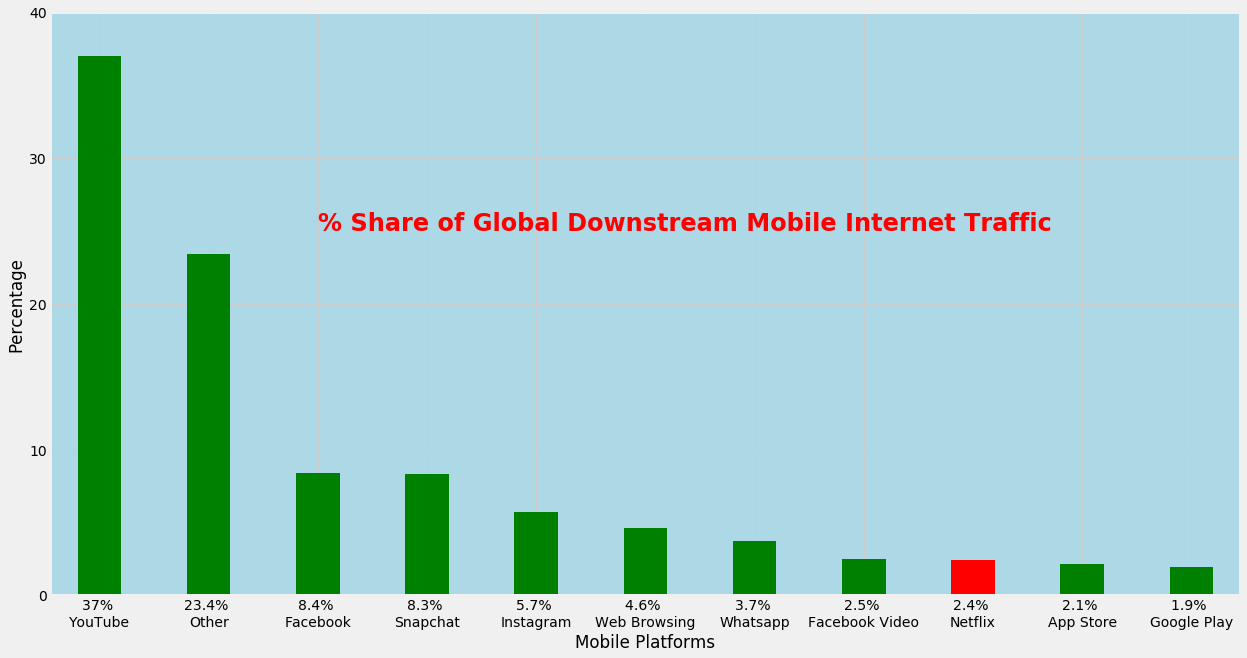

In [0]:
plt.style.use('fivethirtyeight')

global_traffic = pd.Series([37,23.4,8.4,8.3,5.7,4.6,3.7, 2.5,2.4,2.1,1.9],
                 index=['37% \nYouTube', '23.4% \nOther', '8.4% \nFacebook', '8.3% \nSnapchat', '5.7% \nInstagram', '4.6% \nWeb Browsing', '3.7% \nWhatsapp', 
                        '2.5% \nFacebook Video','2.4% \nNetflix', '2.1% \nApp Store', '1.9% \nGoogle Play'])

ax = global_traffic.plot.bar(color=('green','green','green','green','green','green','green','green','red','green','green'), width=0.4);

# label = ["37%","23.4%","8.4%","8.3%","5.7%","4.6%","3.7%","2.5%","2.4%","2.1%","1.9%"]
# plt.text(x=[37,23.4,8.4,8.3,5.7,4.6,3.7, 2.5,2.4,2.1,1.9], y=['YouTube', 'Other', 'Facebook', 'Snapchat', 'Instagram', 'Web Browsing', 'Whatsapp', 'Facebook Video','Netflix', 'App Store', 'Google Play'],s=label, size=6)

ax.set(xlabel='Mobile Platforms', ylabel='Percentage', 
      yticks=range(0,50,10),
      facecolor='lightblue')

fig.patch.set_facecolor

font = {'color':'red'}

ax.text(x=2, y=25, s="% Share of Global Downstream Mobile Internet Traffic",
       fontsize=24, fontweight='bold', fontdict=font);

ax.tick_params(labelrotation=0, axis='x')

In [0]:
nflx_q1['Dates']

0    2002-03-30
1    2003-03-30
2    2004-03-30
3    2005-03-30
4    2006-03-30
5    2007-03-30
6    2008-03-30
7    2009-03-30
8    2010-03-30
9    2011-03-30
10   2012-03-30
11   2013-03-30
12   2014-03-30
13   2015-03-30
14   2016-03-30
15   2017-03-30
16   2018-03-30
Name: Dates, dtype: datetime64[ns]

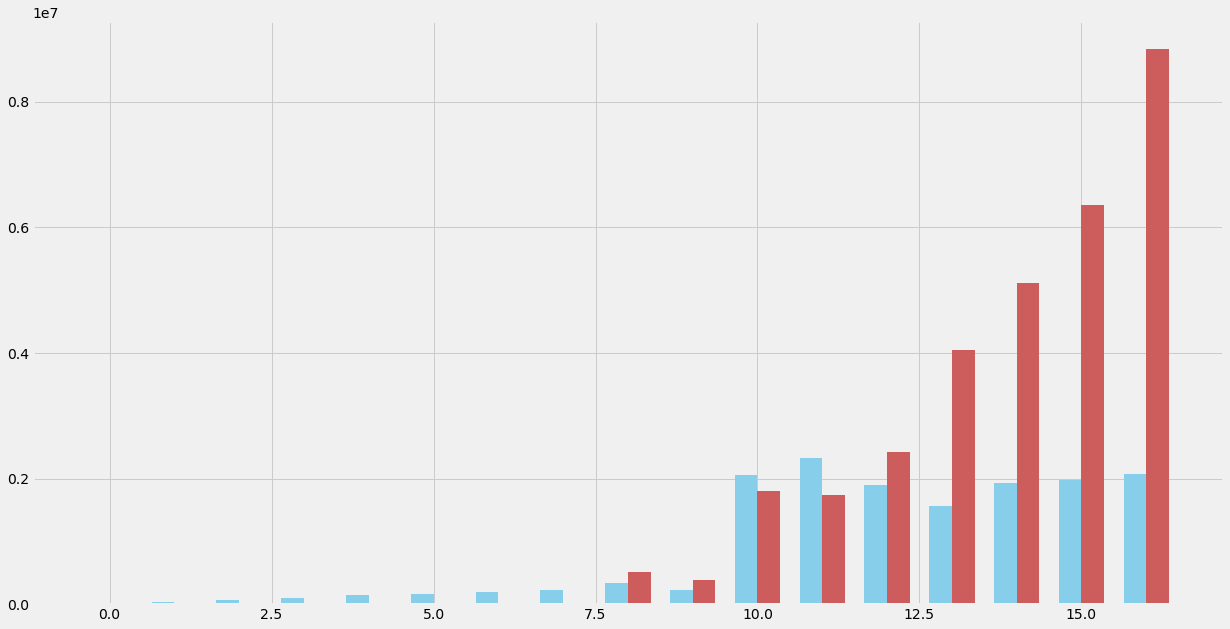

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10

domestic = nflx_q4['Domestic']

international = nflx_q4['International']

ind = np.arange(len(nflx_q4['Date']))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, domestic, width,
                color='SkyBlue', label='Domestic')
rects2 = ax.bar(ind + width/2, international, width,
                color='IndianRed', label='International')

# ax2 = nflx_q4['Quarter']
# color = 'tab:blue'
# ax2.set_ylabel('Stock Price', color=color)  # we already handled the x-label with ax1
# ax2.plot(ind - width/2, nflx_q1['Adj Close'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# plt.plot(ind - width/2, nflx_q1['Adj Close'])



plt.show()

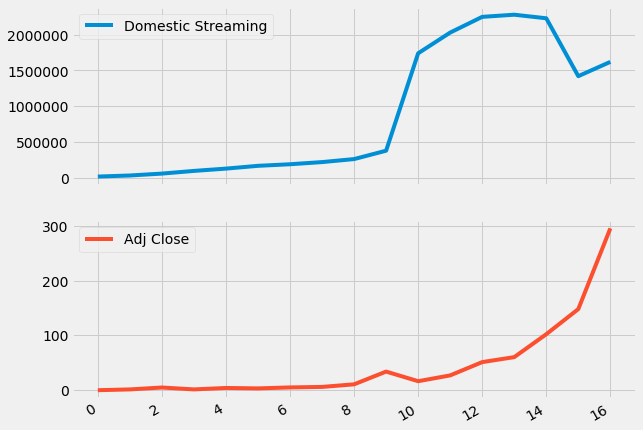

In [0]:
nflx_q1[['Domestic Streaming','Adj Close']].plot(subplots=True, figsize=(9,8));

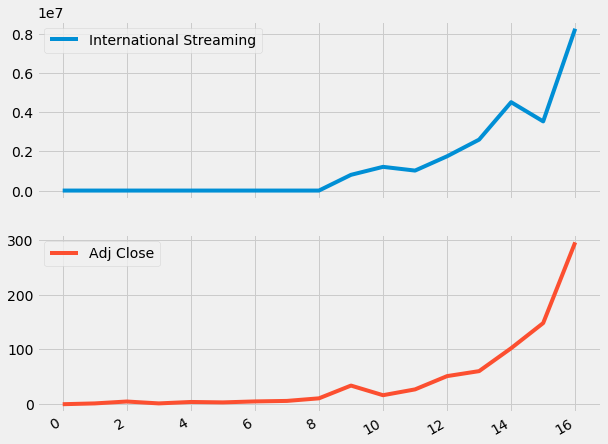

In [0]:
style.use('fivethirtyeight')
nflx_q1[['International Streaming','Adj Close']].plot(subplots=True, figsize=(9,8));

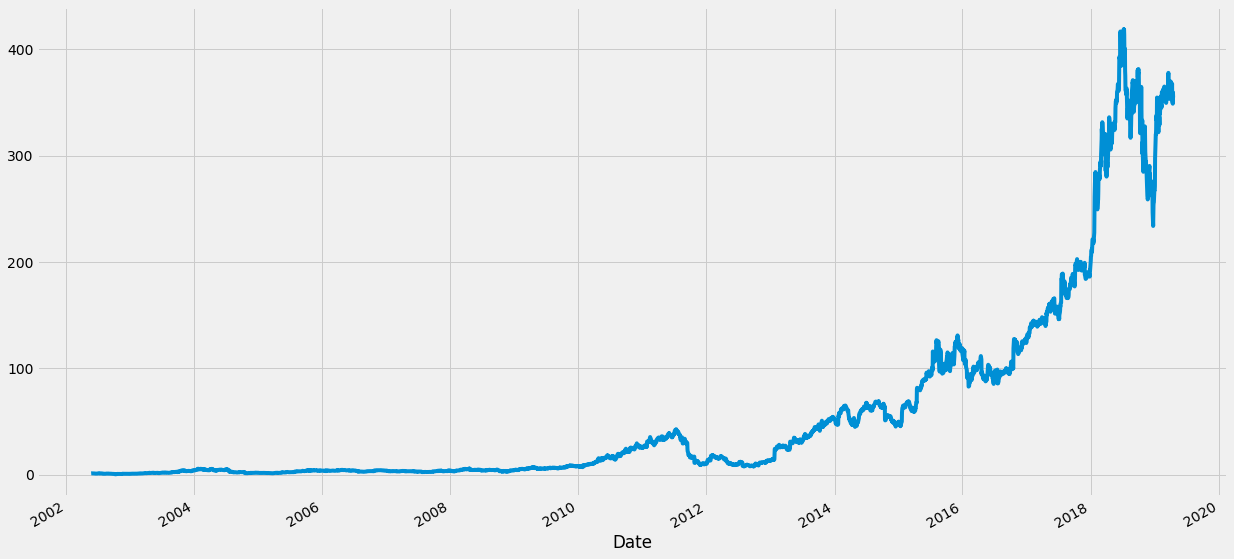

In [0]:
style.use("fivethirtyeight")
start = dt.datetime(2002,5,23)
end = dt.datetime(2019,4,17)

df = web.get_data_yahoo("NFLX", start, end)
df['Adj Close'].plot();
plt.show()

In [0]:
nflx_net_adds.count()

In [0]:
nflx_net_adds.columns = ['Year','Year','Quarter-Year','Domestic Streaming','International Streaming']

In [0]:
nflx_net_adds.head()

In [0]:
nflx_net_adds = nflx_net_adds.drop([0], axis=0)

In [0]:
nflx_net_adds = nflx_net_adds.drop(['Year','Year'], axis=1)

In [0]:
nflx_net_adds.head()

In [0]:
nflx_net_adds.count()

In [0]:
"""
The company calculates churn as a monthly percentage determined by subtracting from one, a quotient, 
the numerator of which is the ending subscribers for the current quarter and the denominator of which 
is the sum of the previous quarter's ending subscribers plus the current quarter's new trial subscribers 
and then dividing this resulting number by 3, which is the number of months in the quarter.

"""